# Data Science Project: Heart Failure Prediction Datasets
###https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [83]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1=pd.read_csv('heart.csv')
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df1.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [4]:
df1.Sex=df1.Sex.map({'M':'1','F':'2'})


In [5]:
df1.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,2,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,2,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,1,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,2,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,1,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,1,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,2,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [84]:
df1.shape

(918, 12)

(array([  1.,   0.,   0.,   0.,  12., 148., 430., 234.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

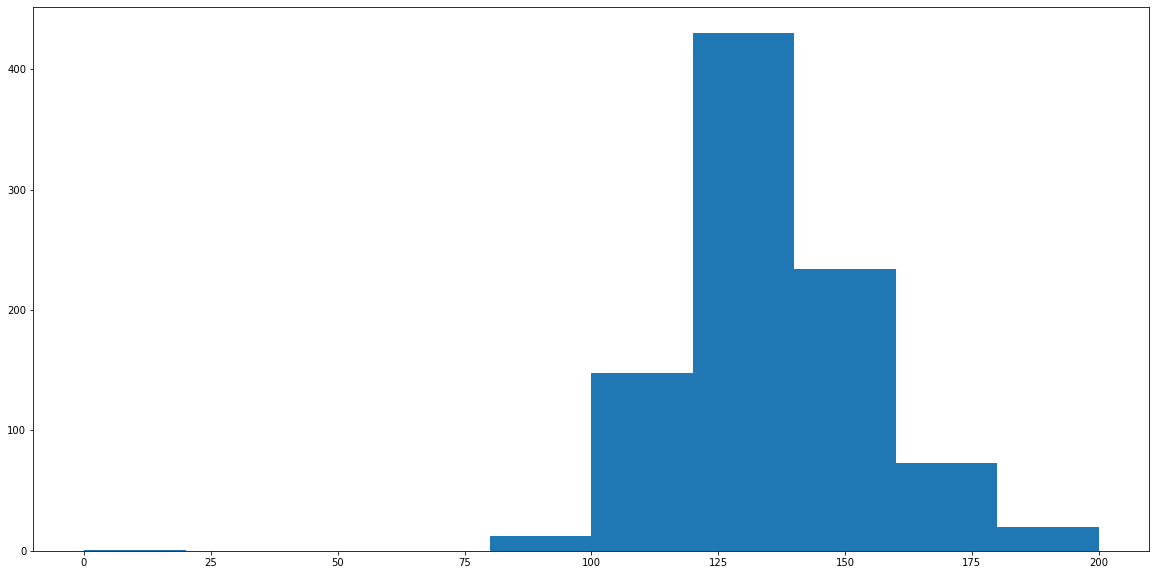

In [6]:
plt.hist(df1.RestingBP)

(array([172.,   6.,  70., 319., 248.,  81.,  14.,   3.,   3.,   2.]),
 array([  0. ,  60.3, 120.6, 180.9, 241.2, 301.5, 361.8, 422.1, 482.4,
        542.7, 603. ]),
 <BarContainer object of 10 artists>)

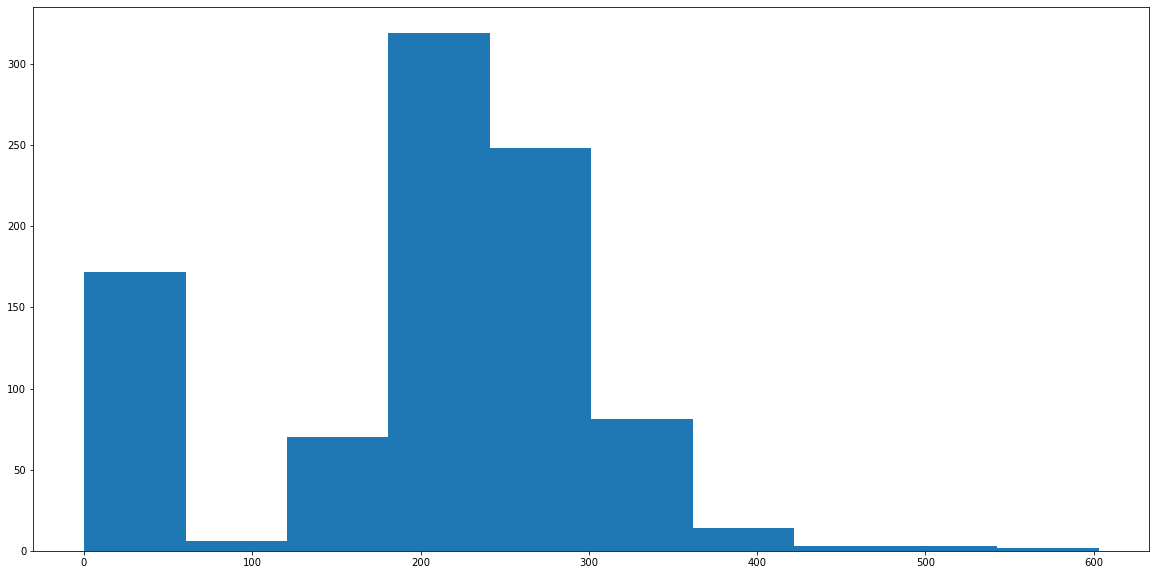

In [7]:
plt.hist(df1.Cholesterol)

In [8]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### using one hot encoding for chest Pain type

In [10]:
dummies=pd.get_dummies(df1.ChestPainType)

In [11]:
dummies

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [12]:
df3=pd.concat([df1,dummies],axis='columns')
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,2,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,2,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0


In [13]:
df3=df3.drop('ChestPainType',axis='columns')
df3.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,2,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0


In [14]:
df3=df3[df3.Cholesterol>0]

In [15]:
df3=df3.drop('ST_Slope',axis='columns')
df3.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA
0,40,1,140,289,0,Normal,172,N,0.0,0,0,1,0,0
1,49,2,160,180,0,Normal,156,N,1.0,1,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,0,0,1,0,0
3,48,2,138,214,0,Normal,108,Y,1.5,1,1,0,0,0
4,54,1,150,195,0,Normal,122,N,0.0,0,0,0,1,0


In [16]:
df3.ExerciseAngina=df3.ExerciseAngina.map({'N':'0','Y':'1'})
df3.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA
0,40,1,140,289,0,Normal,172,0,0.0,0,0,1,0,0
1,49,2,160,180,0,Normal,156,0,1.0,1,0,0,1,0
2,37,1,130,283,0,ST,98,0,0.0,0,0,1,0,0
3,48,2,138,214,0,Normal,108,1,1.5,1,1,0,0,0
4,54,1,150,195,0,Normal,122,0,0.0,0,0,0,1,0


In [17]:
df3.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [18]:
df3.RestingECG=df3.RestingECG.map({'Normal':'1','ST':'2','LVH':'3'})
df3.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA
0,40,1,140,289,0,1,172,0,0.0,0,0,1,0,0
1,49,2,160,180,0,1,156,0,1.0,1,0,0,1,0
2,37,1,130,283,0,2,98,0,0.0,0,0,1,0,0
3,48,2,138,214,0,1,108,1,1.5,1,1,0,0,0
4,54,1,150,195,0,1,122,0,0.0,0,0,0,1,0


In [19]:
df3=df3[df3.Cholesterol>0]

In [58]:
df3.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000
mean,52.227941,131.703431,204.450980,0.149510,140.583333,0.842157,0.42402,0.460784,0.213235,0.262255,0.063725
std,9.652411,16.545456,28.496434,0.357028,24.752989,1.052965,0.49480,0.499072,0.410095,0.440401,0.244563
min,28.000000,92.000000,85.000000,0.000000,71.000000,-0.100000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,120.000000,188.000000,0.000000,122.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,130.000000,211.000000,0.000000,140.000000,0.300000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,140.000000,225.000000,0.000000,160.000000,1.500000,1.00000,1.000000,0.000000,1.000000,0.000000
max,77.000000,200.000000,244.000000,1.000000,202.000000,6.200000,1.00000,1.000000,1.000000,1.000000,1.000000


#### Outlier Removal Using Standard Deviation and Mean

In [59]:
mean=df3.Cholesterol.mean()
st=df3.Cholesterol.std()
print(mean)
st

204.45098039215685


28.49643365797203

In [60]:
up=mean+6*st
lo=mean-6*st
print(up)
print(lo)

375.429582339989
33.472378444324676


In [61]:
df3=df3[(df3.Cholesterol>lo) & (df3.Cholesterol<mean)]
df3.shape

(175, 14)

In [62]:
X=df3.drop('HeartDisease',axis='columns')
y=df3['HeartDisease']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [64]:
X=scaler.fit_transform(X)
X

array([[-0.24897735,  1.89875305,  1.63604228, ..., -0.55314569,
         1.72547754, -0.27132938],
       [ 0.24954709, -0.52666143,  1.04970724, ..., -0.55314569,
         1.72547754, -0.27132938],
       [ 0.64836664, -0.52666143,  0.22883819, ...,  1.807842  ,
        -0.57954971, -0.27132938],
       ...,
       [ 1.64541551, -0.52666143,  0.69790622, ..., -0.55314569,
        -0.57954971, -0.27132938],
       [ 0.54866175, -0.52666143, -0.12296283, ..., -0.55314569,
        -0.57954971, -0.27132938],
       [-1.3457311 , -0.52666143,  0.3461052 , ..., -0.55314569,
         1.72547754, -0.27132938]])

In [65]:
X.shape

(175, 13)

In [66]:
y.head()

1     1
4     0
11    1
12    0
16    1
Name: HeartDisease, dtype: int64

In [67]:
X.shape

(175, 13)

#### build a mode now....

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()

In [71]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [72]:
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor

In [73]:
kernels=["linear","rbf"]

In [74]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [75]:
model.score(X_test,y_test)

0.8

In [76]:
model1=RandomForestClassifier(n_estimators=5)
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [77]:
model1.score(X_test,y_test)

0.8

#### Use K Fold cross validation to measure accuracy of our SVC model and DecisionTreeClassifier model

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#cr=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(SVC(),X,y,cv=5)

array([0.82857143, 0.88571429, 0.85714286, 0.8       , 0.85714286])

In [79]:
cross_val_score(DecisionTreeClassifier(),X,y,cv=5)

array([0.74285714, 0.8       , 0.74285714, 0.71428571, 0.85714286])

In [80]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def find_best_model(X,y):
    algos={
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,10,20],
                'kernel':['rbf','linear']
            }
        },
        
        
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=5,return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        
        })
        return pd.DataFrame(score,columns=['model','best_score','best_params'])
    

        
            
        
        

####  find the best  model and parameters with best  accuracy....

In [82]:
find_best_model(X,y)

,model,best_score,best_params
0,svm,0.857143,"{'C': 10, 'kernel': 'linear'}"
